In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
path = 'resultados'

In [16]:
padrao_arquivos = os.path.join(path, '*')  # define o padrão para listar todos os arquivos na pasta
lista_arquivos = glob.glob(padrao_arquivos)
lista_arquivos

['resultados\\FPGAin.txt',
 'resultados\\FPGAout-PC.txt',
 'resultados\\FPGAout.txt',
 'resultados\\Profiling.csv']

In [17]:
profiling = pd.read_csv(lista_arquivos[3])

In [18]:
profiling

,step,square_root,calculateIntersection,getAngleFromModel,leastSquare,coefficientOfDetermination,inliersOutliersMemory,inliersOutliers,squareDistanceBetweenPoints
0,0,0,0,0,0,0,854668,0,0
1,1,40936,8971,205538,3986004,9706365,870943,5691286,44610
2,2,0,0,0,0,0,873550,0,0
3,3,47692,8723,212771,2903559,5678950,942190,3955625,41610
4,4,0,0,0,0,0,866099,0,0
5,5,0,0,0,0,0,913033,0,0
6,6,40815,9223,207415,8705452,23442150,1305583,14079831,20720
7,7,0,0,0,0,0,1149664,0,0
8,8,14522,8880,212846,4229679,10683057,807910,8690790,35548
9,9,0,0,0,0,0,1156941,0,0


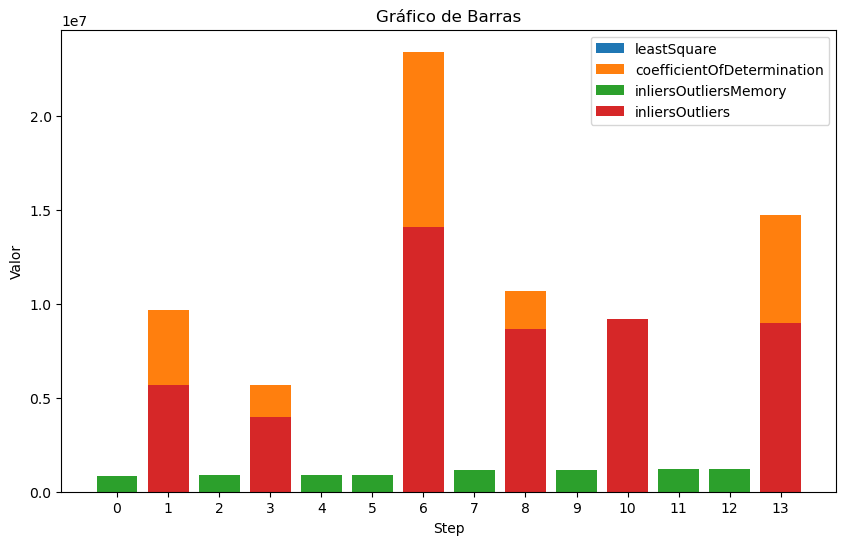

In [39]:
plt.figure(figsize=(10, 6))
#plt.bar(profiling['step'], profiling['square_root'], label='square_root')
#plt.bar(profiling['step'], profiling['calculateIntersection'], label='calculateIntersection')
#plt.bar(profiling['step'], profiling['getAngleFromModel'], label='getAngleFromModel')
plt.bar(profiling['step'], profiling['leastSquare'], label='leastSquare')
plt.bar(profiling['step'], profiling['coefficientOfDetermination'], label='coefficientOfDetermination')
plt.bar(profiling['step'], profiling['inliersOutliersMemory'], label='inliersOutliersMemory')
plt.bar(profiling['step'], profiling['inliersOutliers'], label='inliersOutliers')
#plt.bar(profiling['step'], profiling['squareDistanceBetweenPoints'], label='squareDistanceBetweenPoints')


plt.xticks(profiling['step'])
plt.xlabel('Step')
plt.ylabel('Valor')
plt.title('Gráfico de Barras')
plt.legend()


plt.show()

In [42]:
valor_minimo = np.min(profiling[profiling['coefficientOfDetermination'] != 0]['coefficientOfDetermination'])
valor_minimo

4609508

In [26]:
def FPGAout_read(filename):
    data = []
    columns = ['step', 'model', 'bestfit', 'inliers', 'angle', 'distance']

    with open(filename, 'r') as file:
        while True:
            result = {}
            test_case = file.readline().strip()
            if not test_case:
                break
            result['step'] = int(test_case)
            result['model'] = list(map(float, file.readline()[1:-2].split(',')))
            result['bestfit'] = float(file.readline().strip())
            result['inliers'] = int(file.readline().strip())
            result['angle'] = float(file.readline().strip())
            result['distance'] = float(file.readline().strip())
            file.readline()
            data.append(result)

    return pd.DataFrame(data, columns=columns)

In [27]:
FPGA_out_PC = FPGAout_read(lista_arquivos[1])

In [28]:
FPGA_out_PC

,step,model,bestfit,inliers,angle,distance
0,0,"[0.0, 25.0]",inf,0,0.000000,50.000000
1,1,"[1.849611391923474, -9.072286537311804]",0.153965,56,-1.075157,18.421322
2,2,"[0.0, 25.0]",inf,0,-1.075157,50.000000
3,3,"[0.4267146348356053, 15.852611933824722]",0.361517,28,-1.478479,21.436781
4,4,"[0.0, 25.0]",inf,0,-1.478479,50.000000
5,5,"[0.0, 25.0]",inf,0,-1.478479,50.000000
6,6,"[-0.7649217947693504, 34.272184980922894]",0.054745,114,-0.825496,12.121742
7,7,"[0.0, 25.0]",inf,0,-0.825496,50.000000
8,8,"[1.1687408622449298, 24.289339978544156]",0.133508,85,-1.688544,0.608056
9,9,"[0.0, 25.0]",inf,0,-1.688544,50.000000


In [29]:
FPGA_out_NIOS = FPGAout_read(lista_arquivos[2])

In [30]:
FPGA_out_NIOS

,step,model,bestfit,inliers,angle,distance
0,0,"[0.0, 25.0]",inf,153,0.000000,50.000000
1,1,"[1.9253, -11.349117]",0.115460,67,-1.091750,18.141445
2,2,"[0.0, 25.0]",inf,155,0.000000,50.000000
3,3,"[0.481072, 12.98444]",0.236668,40,-0.448391,24.021948
4,4,"[0.0, 25.0]",inf,153,0.000000,50.000000
5,5,"[0.0, 25.0]",inf,152,0.000000,50.000000
6,6,"[-0.770371, 33.592865]",0.029266,145,0.656412,11.000189
7,7,"[0.0, 25.0]",inf,202,0.000000,50.000000
8,8,"[1.203124, 23.710875]",0.116742,95,-0.877336,1.416667
9,9,"[0.0, 25.0]",inf,203,0.000000,50.000000
